In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from six.moves import cPickle 

In [16]:
def load_cifar10():
    f = open('/home/alvin/notebook_home/ai_lab_image/corpus/cifar-10-batches-py/data_batch_1', 'rb')
    datadict = cPickle.load(f,encoding='latin1')
    f.close()
    
    DX= datadict["data"] # 1000 x (32x32x3)
    DY= datadict['labels']
    #X = DX.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
    X = np.array(DX)
    Y = np.array(DY)
    return X,Y

In [17]:
cifar_label = { '0':'airplane',
                '1':'automobile',
                '2':'bird',
                '3':'cat',
                '4':'deer',
                '5':'dog',
                '6':'frog',
                '7':'horse',
                '8':'ship',
                '9':'truck'}

In [18]:
X = np.zeros(0)
Y = np.zeros(0)
X,Y = load_cifar10()

In [ ]:
# display basic information 
print('dataset count = ' + str(len(X)))
for i in range(10):
    print('number of class '+ str(i) + ': ' + str(Y[np.where(Y==i)].size))

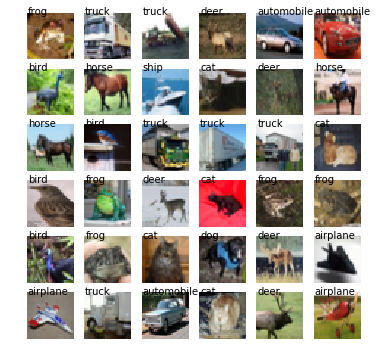

In [19]:
# display cifar image
#Visualizing CIFAR 10 method 2
SX = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
pic_dim = 6
fig, axes1 = plt.subplots(pic_dim,pic_dim,figsize=(6,6))
for i in range(pic_dim*pic_dim):
    #print('i/pic_dim: ' + str(i/pic_dim) + 'i%pic_dim: ' + str(i%pic_dim))
    axes1[int(i/pic_dim)][int(i%pic_dim)].set_axis_off()
    axes1[int(i/pic_dim)][int(i%pic_dim)].imshow(SX[i])
    axes1[int(i/pic_dim)][int(i%pic_dim)].annotate(cifar_label[str(Y[i])],xy=(0.2,0.6))

In [ ]:
###############################################################
#   knn main code
###############################################################

In [20]:
# training set and testing test
t_rate   = 0.8
train_set_num = int(len(X)*t_rate)
train_set = X[:train_set_num]/255
test_set  = X[train_set_num+1:]/255

In [45]:
def l1_dist(input_vec, train_matrix):
    dist = abs(input_vec - train_matrix)
    dist = sum(dist)

def l2_dist(input_vec, train_vec):
    dist = (input_vec - train_vec)
    dist = np.dot(dist, dist.reshape(len(dist),1))

In [21]:
len(train_set)

8000

In [46]:
int_v = test_set[0][:5]/255
trn_v = train_set[0:1][:5]/255
print(int_v)
print(trn_v)

[ 0.65882353  0.6627451   0.6745098   0.68627451  0.69803922]
[[ 0.23137255  0.16862745  0.19607843 ...,  0.54901961  0.32941176
   0.28235294]]


In [48]:
dist = np.abs(int_v - trn_v)
print(dist)

ValueError: operands could not be broadcast together with shapes (5,) (1,3072) 

In [27]:
sum(dist)

2.1333333333333333

In [33]:
a = np.array([2, 3])
b = np.array([2, 1]).reshape(2,1)
print(a)
print(b)

[2 3]
[[2]
 [1]]


In [34]:
c = a * b

In [43]:
c = np.dot(a,b)

In [44]:
c

array([7])

In [37]:
d

array([[4, 6],
       [2, 3]])